##### Dataset complete info: https://archive.ics.uci.edu/ml/datasets/car+evaluation

## Attribute information

* Class Values:

    unacc, acc, good, vgood

* Attributes:

    1. buying: vhigh, high, med, low.
    2. maint: vhigh, high, med, low.
    3. doors: 2, 3, 4, 5more.
    4. persons: 2, 4, more.
    5. lug_boot: small, med, big.
    6. safety: low, med, high.



In [21]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
%matplotlib inline


In [22]:
car_data = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"

In [23]:
pd.read_csv(car_data, header=None)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [24]:
columns = ["buying","maint", "doors", "persons", "lug_boot","safety", "class values"]

In [25]:
data = pd.read_csv(car_data, names=columns)
data[:3]

,buying,maint,doors,persons,lug_boot,safety,class values
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc


In [26]:
data.dtypes

buying          object
maint           object
doors           object
persons         object
lug_boot        object
safety          object
class values    object
dtype: object

In [27]:
data['buying'] = data['buying'].map({'vhigh':0, 'high':1, 'med': 2, 'low': 3})
data['maint'] = data['maint'].map({'vhigh':0, 'high':1, 'med': 2, 'low': 3})
data['doors'] = data['doors'].map({'2':0, '3':1, '4': 2, '5more': 3})
data['persons'] = data['persons'].map({'2':0, '4':1, 'more': 2})
data['lug_boot'] = data['lug_boot'].map({'small':0, 'med':1, 'big': 2})
data['safety'] = data['safety'].map({'low':0, 'med':1, 'high': 2})
data['class values'] = data['class values'].map({'unacc':0, 'acc':1, 'good': 2, 'vgood': 3})

In [28]:
data[:3]

,buying,maint,doors,persons,lug_boot,safety,class values
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0


In [29]:
data.dtypes

buying          int64
maint           int64
doors           int64
persons         int64
lug_boot        int64
safety          int64
class values    int64
dtype: object

## Get Target and Features

In [30]:
X, y = data.iloc[:, :-1], data.iloc[:, -1]

In [31]:
print(X.shape)
X[:3]

(1728, 6)


,buying,maint,doors,persons,lug_boot,safety
0,0,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,2


In [32]:
print(y.shape)
y[:3]

(1728,)


0    0
1    0
2    0
Name: class values, dtype: int64

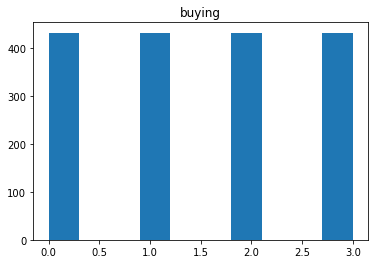

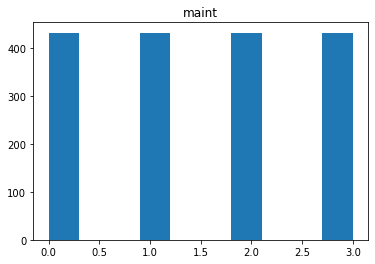

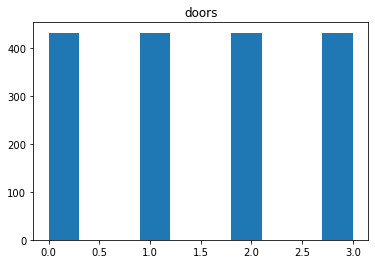

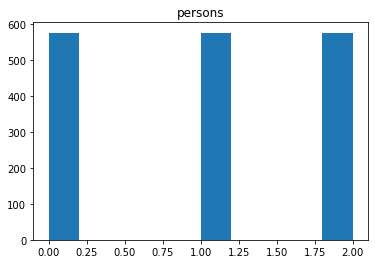

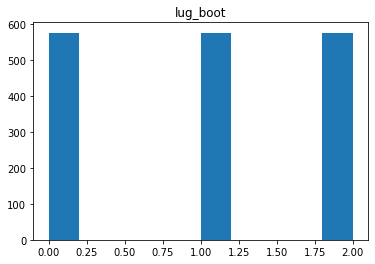

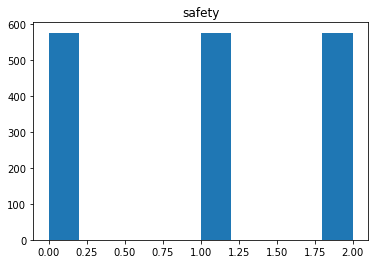

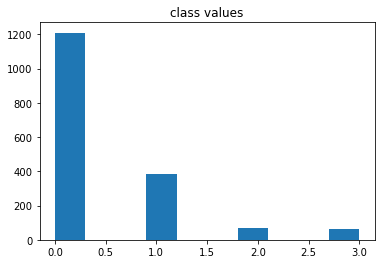

In [33]:
for col_name in data.columns:
        plt.figure()
        plt.hist(data[col_name])
        plt.title(col_name)

## Split and Decision Tree 

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [35]:
print(X_train.shape)
print(X_train[:3])
print(y_train.shape)
print(X_test[:3])
print(X_test.shape)
print(y_train[:3])
print(y_test.shape)
print(y_test[:3])

(1209, 6)
      buying  maint  doors  persons  lug_boot  safety
1178       2      2      3        1         2       2
585        1      1      1        2         0       0
1552       3      2      1        1         1       1
(1209,)
      buying  maint  doors  persons  lug_boot  safety
599        1      1      2        0         1       2
1201       2      3      0        1         1       1
628        1      1      3        0         2       1
(519, 6)
1178    3
585     0
1552    1
Name: class values, dtype: int64
(519,)
599     0
1201    1
628     0
Name: class values, dtype: int64


In [64]:
dt_clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_clf_fit = dt_clf.fit(X_train, y_train)
dt_clf_fit

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [66]:
# Predicting the test set result  
y_pred = dt_clf.predict(X_test) 

In [68]:
# Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix   
cm = confusion_matrix(y_test, y_pred)  
cm

array([[358,   0,   0,   0],
       [  3, 109,   6,   0],
       [  0,   1,  18,   0],
       [  0,   3,   0,  21]], dtype=int64)

In [43]:
# checking  max features
dt_clf.max_features_

6

In [44]:
# checking classes
dt_clf.classes_

array([0, 1, 2, 3], dtype=int64)

In [48]:
# checking tree
dt_clf.tree_

[Text(0.34650735294117646, 0.9615384615384616, 'safety <= 0.5\nentropy = 1.192\nsamples = 1209\nvalue = [852, 266, 50, 41]\nclass = unacc'),
 Text(0.3318014705882353, 0.8846153846153846, 'entropy = 0.0\nsamples = 407\nvalue = [407, 0, 0, 0]\nclass = unacc'),
 Text(0.36121323529411764, 0.8846153846153846, 'persons <= 0.5\nentropy = 1.469\nsamples = 802\nvalue = [445, 266, 50, 41]\nclass = unacc'),
 Text(0.34650735294117646, 0.8076923076923077, 'entropy = 0.0\nsamples = 260\nvalue = [260, 0, 0, 0]\nclass = unacc'),
 Text(0.3759191176470588, 0.8076923076923077, 'buying <= 1.5\nentropy = 1.632\nsamples = 542\nvalue = [185, 266, 50, 41]\nclass = acc'),
 Text(0.125, 0.7307692307692307, 'maint <= 1.5\nentropy = 0.995\nsamples = 278\nvalue = [151, 127, 0, 0]\nclass = unacc'),
 Text(0.04411764705882353, 0.6538461538461539, 'buying <= 0.5\nentropy = 0.608\nsamples = 134\nvalue = [114, 20, 0, 0]\nclass = unacc'),
 Text(0.029411764705882353, 0.5769230769230769, 'entropy = 0.0\nsamples = 71\nvalue 

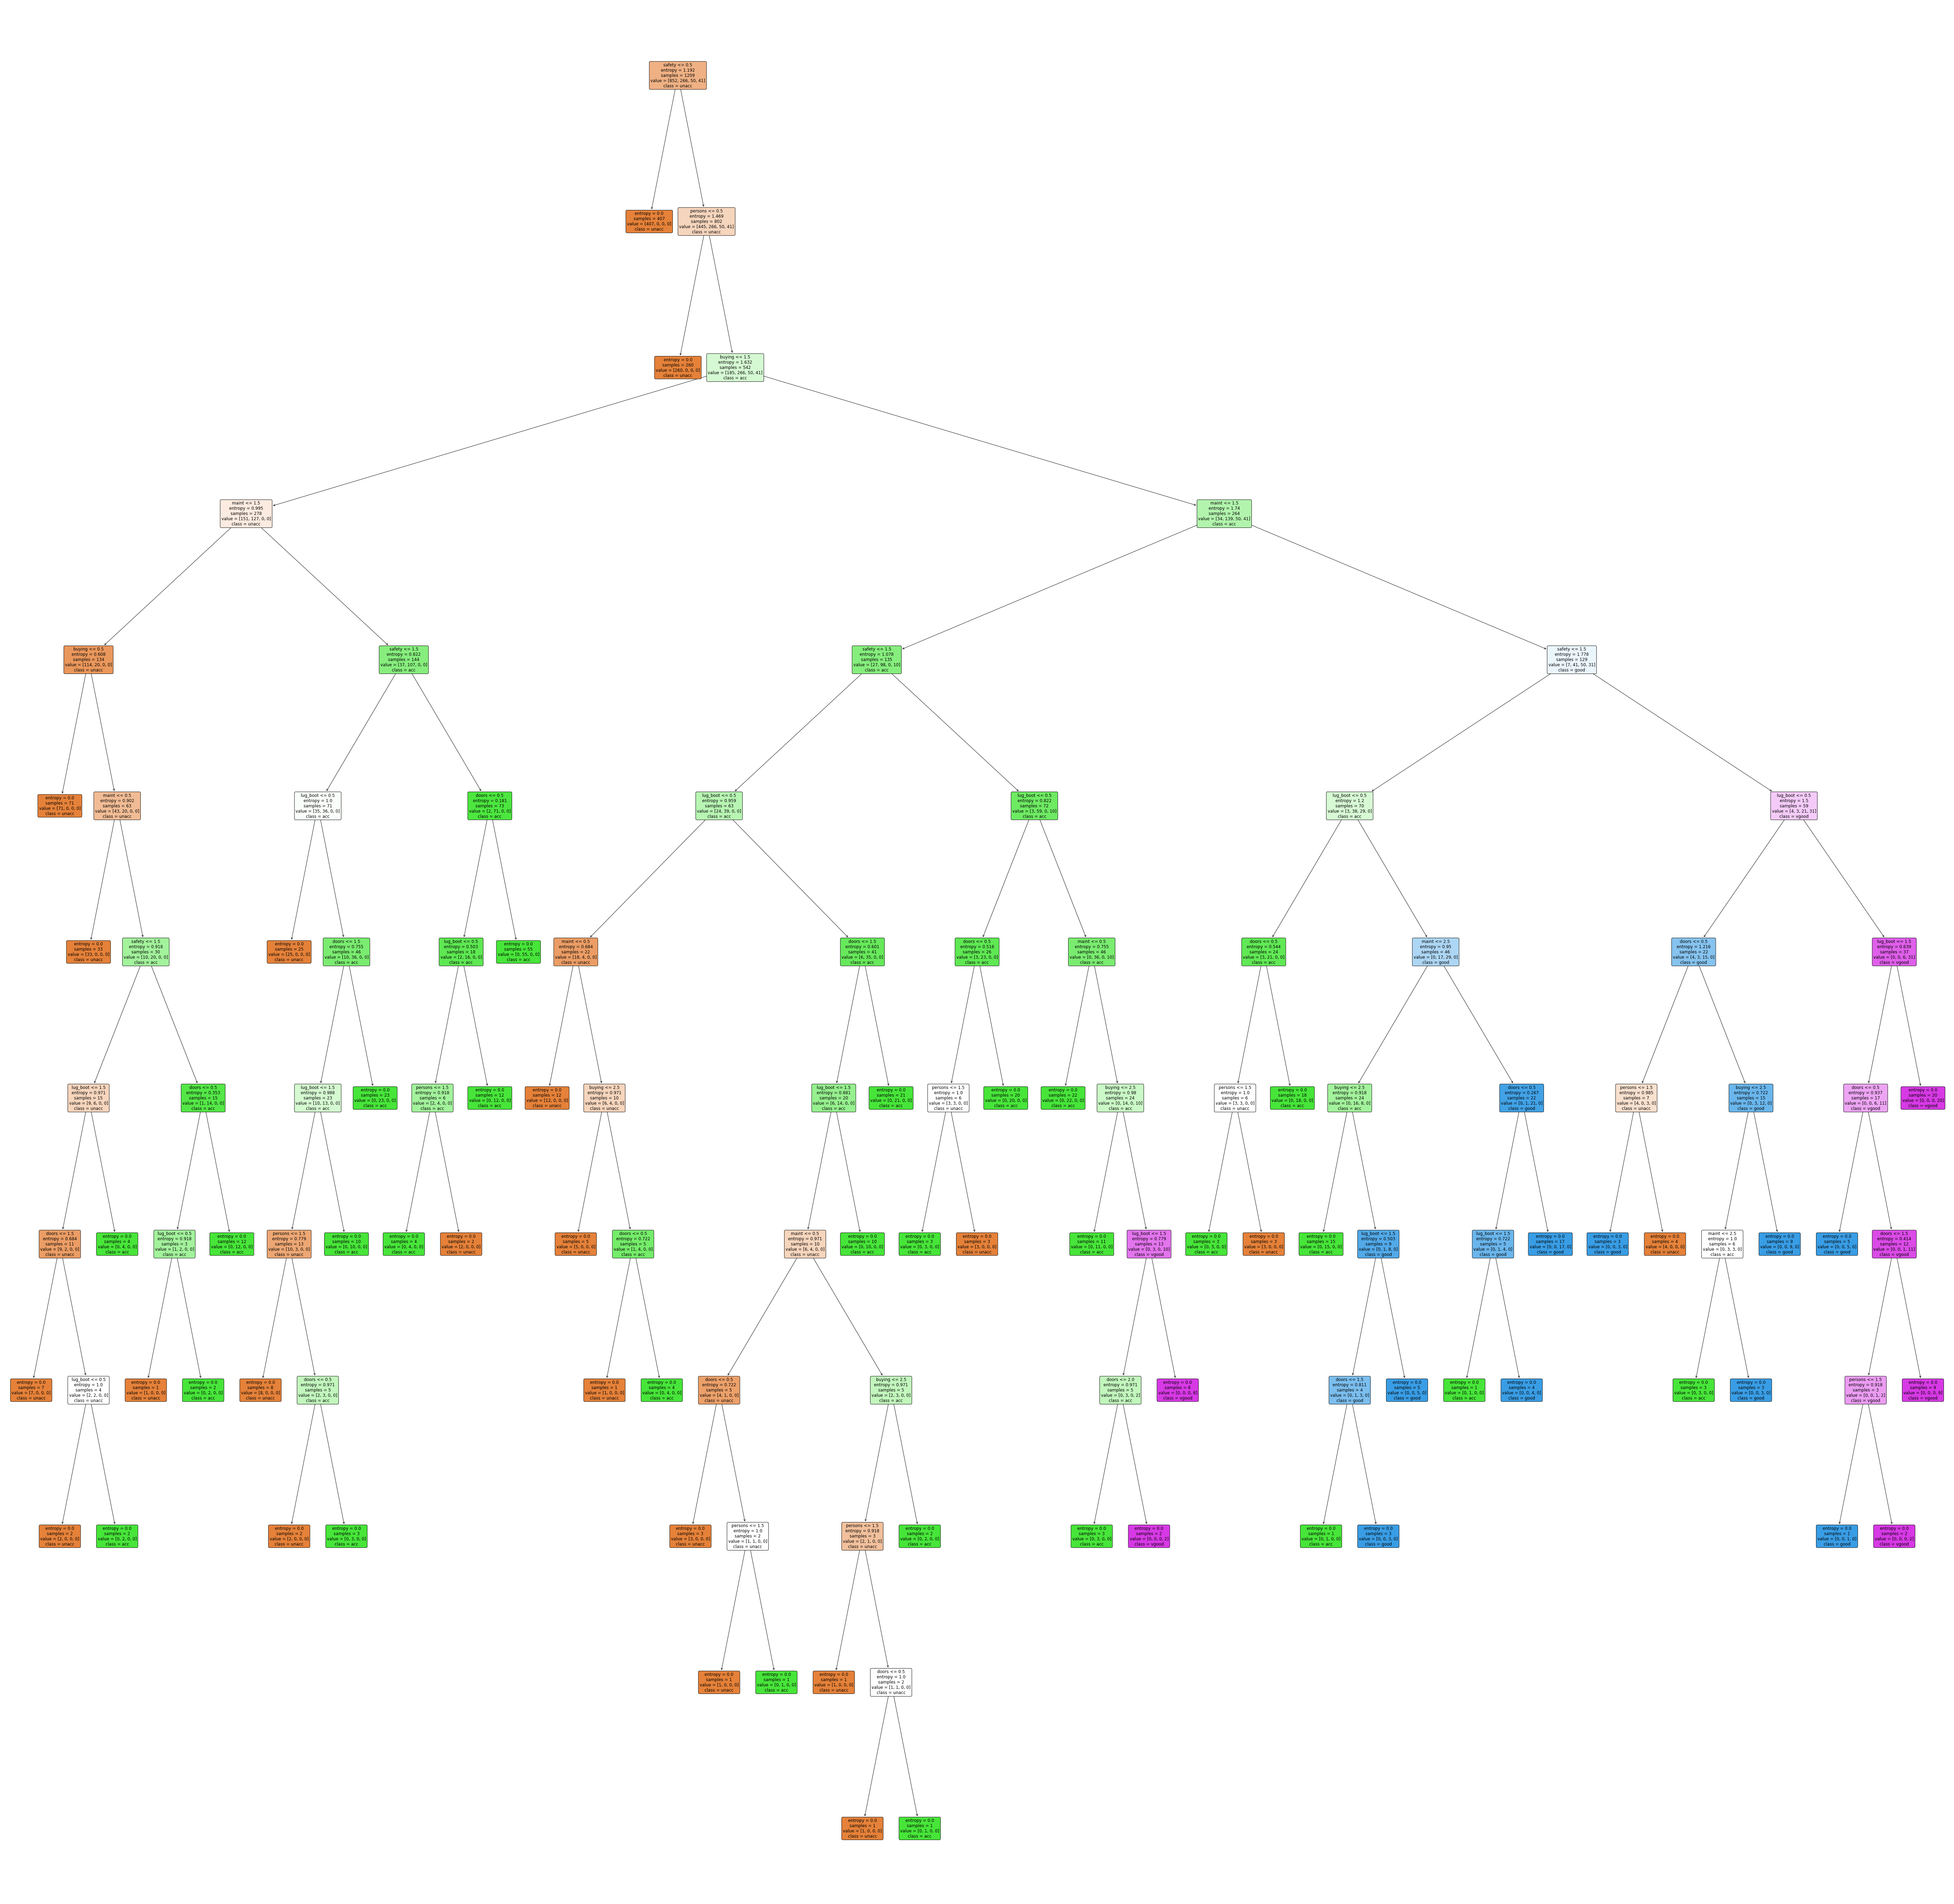

In [65]:
# plotting the decision tree
plt.figure(figsize=(100, 100))
plot_tree(dt_clf,
          filled=True,
          rounded=True,
          impurity=True,
          class_names=['unacc', 'acc', 'good', 'vgood'],
         feature_names=X.columns)

## Confusion Matrix

C:\Users\ritth\software\anaconda\envs\strive\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


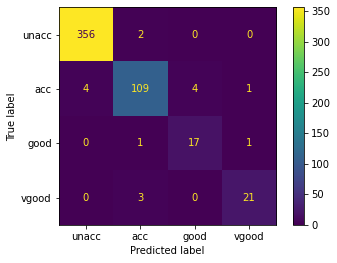

In [52]:
plot_confusion_matrix(dt_clf, X_test, y_test, display_labels=['unacc', 'acc', 'good', 'vgood'])

In [53]:
pred = dt_clf.predict(X_test)

In [60]:
(pred == y_test).unique()

array([ True, False])

In [61]:
(pred == y_test).value_counts

<bound method IndexOpsMixin.value_counts of 599     True
1201    True
628     True
1498    True
1263    True
        ... 
490     True
1277    True
287     True
1639    True
1714    True
Name: class values, Length: 519, dtype: bool>

In [54]:
(pred == y_test).sum()/ len(y_test)

0.9691714836223507